<h4>Simple Agent Classwork </h4> 
<p>Date: 23.03.21</p>

Idea : It is a perman-based agent, which flies in the sky, goes to headquarter meetings with its boss, walks with its friends on land, climbs up and down hills, and goes swimming with friends. It also carries out rescue operations over the oceans by flying. 
<p>Reference: Perman is a Japanese manga series written and illustrated by the manga artist duo Fujiko Fujio about a clumsy boy, Mitsuo Suwa, who is chosen to apprentice to a powerful superhero to save the world along with other superheroes. </p>

In [33]:
import random
random.seed(7)

class env_aware_agent:
    def __init__(self):
    #prior knowledge / state
        self.position_sense = 0
        self.count = [0 for i in range(6)]
        
    def move(self,env):
        n = env.get_limit()
        if self.position_sense < n:
            if env.get_property(self.position_sense) == "land":
                print("_&_&_Walking_&_&_ with friends")
                self.position_sense += 1
                self.count[0] += 1
                
            elif env.get_property(self.position_sense) == "water":
                print("_<_<_Swimming_>_>_ with friends")
                self.position_sense += 1
                self.count[1] += 1
                
            elif env.get_property(self.position_sense) == "airup":
                ran = random.randint(1,15)
                r = ran*2+self.position_sense
                choice = ran if n>r else 1
                for i in range(choice):
                    print("_^_Flying up_^_ as perman")
                self.position_sense += choice
                for i in range(choice):
                    print("_v_Flying down_v_ as perman")
                self.position_sense += choice
                self.count[2] += choice*2
                
            elif env.get_property(self.position_sense) == "hillup":
                ran = random.randint(0,10)
                r = ran*2+self.position_sense
                choice = ran if n>r else 1
                for i in range(choice):
                    print("_AA_Climbing hill up_AA_ with friends")
                self.position_sense += choice
                for i in range(choice):
                    print("_VV_Going down the hill_VV_ with friends")
                self.position_sense += choice
                self.count[3] += choice*2
                
            elif env.get_property(self.position_sense) == "oceanfly":
                ran = random.randint(5,20)
                r = ran*2+self.position_sense
                length = ran if n>r else 1
                for i in range(length):
                    print("<<< Flying over the ocean for rescue operation <<<")
                self.position_sense += length
                self.count[4] += length*2
            
            elif env.get_property(self.position_sense) == "birdman":
                print("$$**Important Meeting with birdman at headquarters**$$")
                self.position_sense += 1
                self.count[5] += 1
            
            return True
        
        else:
            self.tell_position()
            print("Reached home at end of the day ... !!" )
            return False
        
    def tell_position(self):
        print("I have currently moved ", self.position_sense, "steps")
        
    def get_count(self):
        return self.count
    

In [34]:
class Perman_environment:
    def __init__(self):
        self.limit = 112 #will go home after 100 steps
        self.property = {}
        self.env = ["land","water","airup","hillup","oceanfly","birdman"];
        for pos in range(self.limit):
            if pos < self.limit/6:
                self.property[pos] = random.choice(self.env[:3])
            else: 
                self.property[pos] = random.choice(self.env[3:])
        # print(self.property)
        
    def get_limit(self):
        return self.limit
    
    def get_property(self,pos):
        return self.property[pos]
    
    def get_env(self):
        return self.env

In [35]:
my_agent = env_aware_agent()
my_env = Perman_environment()

status = True

while(status):
    status = my_agent.move(my_env)

_<_<_Swimming_>_>_ with friends
_&_&_Walking_&_&_ with friends
_<_<_Swimming_>_>_ with friends
_^_Flying up_^_ as perman
_^_Flying up_^_ as perman
_^_Flying up_^_ as perman
_^_Flying up_^_ as perman
_^_Flying up_^_ as perman
_^_Flying up_^_ as perman
_^_Flying up_^_ as perman
_^_Flying up_^_ as perman
_^_Flying up_^_ as perman
_^_Flying up_^_ as perman
_^_Flying up_^_ as perman
_^_Flying up_^_ as perman
_v_Flying down_v_ as perman
_v_Flying down_v_ as perman
_v_Flying down_v_ as perman
_v_Flying down_v_ as perman
_v_Flying down_v_ as perman
_v_Flying down_v_ as perman
_v_Flying down_v_ as perman
_v_Flying down_v_ as perman
_v_Flying down_v_ as perman
_v_Flying down_v_ as perman
_v_Flying down_v_ as perman
_v_Flying down_v_ as perman
$$**Important Meeting with birdman at headquarters**$$
$$**Important Meeting with birdman at headquarters**$$
_AA_Climbing hill up_AA_ with friends
_AA_Climbing hill up_AA_ with friends
_AA_Climbing hill up_AA_ with friends
_AA_Climbing hill up_AA_ with fri

['land', 'water', 'airup', 'hillup', 'oceanfly', 'birdman']  -  [1, 2, 24, 44, 72, 5]


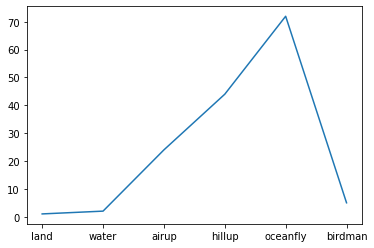

In [36]:
import matplotlib.pyplot as plt

x = my_env.get_env()
y = my_agent.get_count()

print(x, " - ", y)

plt.plot(x,y)
plt.show()